In [147]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [379]:
# ==================== Cleaning data to obtain y_train ====================
dataset=pandas.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')
print(dataset) 
dataset = dataset.to_numpy()

for i in dataset:
 i[0]=i[0].split("\t")
y_train=np.zeros((5000, 1) , dtype=object, )

count=0
for i in dataset:
   
    y_train[count][0]=i[0][2]
    
    
    y_train[count][0]=float(y_train[count][0])
    
    if y_train[count][0] == -1 :
        y_train[count][0] = 0
    
    count+=1
    

print(y_train[4999])

     \timg_name\tgender\tsmiling
0                0\t0.jpg\t-1\t1
1                1\t1.jpg\t-1\t1
2                2\t2.jpg\t1\t-1
3               3\t3.jpg\t-1\t-1
4               4\t4.jpg\t-1\t-1
...                          ...
4995        4995\t4995.jpg\t1\t1
4996        4996\t4996.jpg\t1\t1
4997        4997\t4997.jpg\t1\t1
4998        4998\t4998.jpg\t1\t1
4999        4999\t4999.jpg\t1\t1

[5000 rows x 1 columns]
[1.0]


In [380]:
# ==================== setting values of x_train ==========================
run_samples = 2000
labels=np.zeros((5000, 1) , dtype=object, )

count=0
for i in dataset:
   
    labels[count][0]=i[0][1]
    count+=1
    

x_train = np.zeros((5000, 28392) , dtype=object, )

for i in range(0,run_samples):
    
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labels[i][0])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    
    count = 0
    for j in range(18,int(218-18)): #182
        for j2 in range(11,int(178-11)): #156
            x_train[i][count] = image[j,j2]
            count+=1
    #plt.imshow(image , cmap='gray', vmin=0, vmax=255)
    #plt.show()
    #time.sleep(1)
    #clear_output(wait=True)
    
# ==================== Dimensionality reduction of x_train ====================
scaler = MinMaxScaler()
x_train[0:run_samples] = scaler.fit_transform(x_train[0:run_samples]) # fit only a cetain set of data

pca = PCA(n_components=450)
pca.fit(x_train[0:run_samples]) #makes principle component axis
x_train_pca = pca.transform(x_train[0:run_samples]) # uses principle component axis to reduce dimension of data

# ==================== Fitting Data to model ====================
y_train=y_train.astype('float')
x_train_pca=x_train_pca.astype('float')


logreg = LogisticRegression(solver='lbfgs', max_iter=200)
logreg.fit(x_train_pca[0:run_samples], y_train[0:run_samples].ravel())

C:\Users\X99S5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [410]:
print(pca.explained_variance_ratio_.sum()) # means pc1 only explains 31% of the variation and the rest is explained by 449 of the others

loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[0:15000].sum()/sorted_loading_scores[0:28392].sum())
print(sorted_loading_scores[0:10])
#print(x_train[0])

0.9653162234517458
0.819980226435469
1425    0.010358
1581    0.010356
1424    0.010321
1736    0.010320
1580    0.010318
1737    0.010309
1269    0.010309
1893    0.010301
1268    0.010300
956     0.010300
dtype: float64


C:\Users\X99S5\AppData\Local\Temp\ipykernel_19424\3132245213.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(sorted_loading_scores[0:15000].sum()/sorted_loading_scores[0:28392].sum())
C:\Users\X99S5\AppData\Local\Temp\ipykernel_19424\3132245213.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(sorted_loading_scores[0:10])


C:\Users\X99S5\AppData\Local\Temp\ipykernel_19424\1943881665.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i in sorted_loading_scores[0:15000].index.values:


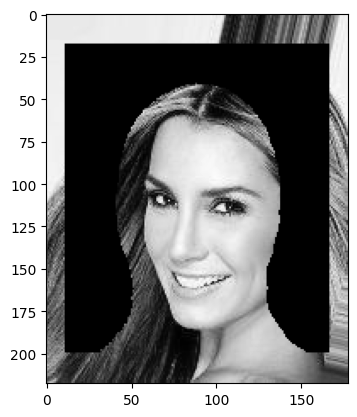

In [411]:
image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labels[0][0])

image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
for i in sorted_loading_scores[0:15000].index.values:
    image[18+int(i/156),i%(156)+11] = 0
    
plt.imshow(image , cmap='gray', vmin=0, vmax=255)
plt.show()

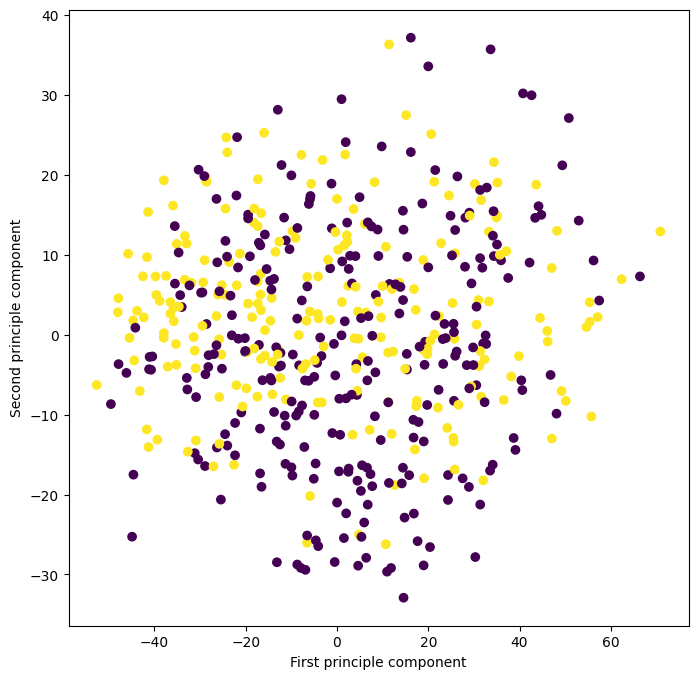

In [383]:
plt.figure(figsize=(8, 8))
#ax = fig#.add_subplot(projection='2d')

plt.scatter(x_train_pca[0:500,0],x_train_pca[0:500,1],c=y_train[0:500])
plt.xlabel("First principle component")
plt.ylabel("Second principle component")
# ax.zlabel("Third principle component")
plt.show()

In [168]:
#print(x_train[0][0])
# x_train=x_train.astype('float')
# plt.imshow(x_train[5] , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [388]:


end=5000
start=3000

for i in range(start,end):
    
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labels[i][0])
   
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    count = 0
    for j in range(18,int(218-18)): #182
            for j2 in range(11,int(178-11)): #156
                x_train[i][count] = image[j,j2]
                count+=1
                
# ==================== Dimensionality reduction of test set ==================== 
x_train[start:end] = scaler.transform(x_train[start:end]) # since scaler model is already defined with variance of  training set, we just transform the test set with the parameters already in the scaler model

x_test_pca = pca.transform(x_train[start:end]) # same thing with pca, since its parameters are already defined based on training set we just transform test set using that parameter model

x_test_pca=x_test_pca.astype('float')

#print(logreg.predict(x_train[start:end]))
logreg.score(x_test_pca[0:end-start],y_train[start:end])

0.8445

In [93]:
x_train.shape

(5000, 28392)

In [179]:
int(1425/218)

6

In [ ]:
# to do: mabye allowing it see color helps? , try doing an average to reduce feature size (done pca instead) ,
#analyse pca to see what pixels account for most variation

In [351]:
labels[5000][0]

0